In [2]:
#IPython is what you are using now to run the notebook
import IPython
print "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__

# Numpy is a library for working with Arrays
import numpy as np
print "Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__

# SciPy implements many different numerical algorithms
import scipy as sp
print "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__

# Pandas makes working with data tables easier
import pandas as pd
print "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__

# Module for plotting
import matplotlib
print "Mapltolib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print "Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__


IPython version:       3.0.0 (need at least 1.0)
Numpy version:        1.10.2 (need at least 1.7.1)
SciPy version:        0.16.0 (need at least 0.12.0)
Pandas version:       0.17.1 (need at least 0.11.0)
Mapltolib version:     1.5.0 (need at least 1.2.1)
Scikit-Learn version:   0.17 (need at least 0.13.1)


##About the Problem Set: 
This is the same problem set used by Emma Spiro in INFX573. The only difference is that instead of doing the problem set in R, you will use Python and the IPython notebook.

##Instructions: 
In this problem set you will perform a basic exploratory analysis on an example dataset, bringing to bear all of your new skills in data manipulation and visualization. You will be required to submit well commented python code, documenting all code used in this problem set, along with a write up answering all questions below. Use figures as appropriate to support your answers, and when required by the problem. 
This data set uses the NYCFlights13 dataset. You can download the dataset from canvas.

# Problem Set 1, due January 13th at 12:00pm 
(in other words, it is due at noon, or one minute after 11:59am).

###Before You Start
Make sure to at least take a basic tutorial in the IPython notebook, otherwise you'll be totally lost.  For this problem set, you should download INFX574-PS1.ipynb and the flights.zip dataset from Canvas. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
ipython notebook <name_of_downloaded_file>
```

You should also make sure the following libraries load correctly (click on the box below and hit Ctrl-Enter)

In [3]:
# Import and alias pyplot from matplotlib
import matplotlib.pyplot as plt

# Set plots to plot inline
%matplotlib inline 

# Import StatsModels for OLS
import statsmodels.api as sm

In [4]:
# Load dataset. Assumes flights.zip has been unpacked and saved as flights.csv in the current directory
# Create dataframe from file 
flights_df = pd.read_csv('flights.csv')

In [5]:
# Get a quick overview of the data
print flights_df.shape # look at num of rows, cols
print flights_df.columns # get names of all cols
print flights_df.dtypes # get data type for each col

(336776, 17)
Index([u'Unnamed: 0', u'year', u'month', u'day', u'dep_time', u'dep_delay',
       u'arr_time', u'arr_delay', u'carrier', u'tailnum', u'flight', u'origin',
       u'dest', u'air_time', u'distance', u'hour', u'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [5]:
# get list of unique destination airport codes in set
print flights_df.dest.unique()

# Check the first 10 rows of data in the dataframe
flights_df.head(10)

['IAH' 'MIA' 'BQN' 'ATL' 'ORD' 'FLL' 'IAD' 'MCO' 'PBI' 'TPA' 'LAX' 'SFO'
 'DFW' 'BOS' 'LAS' 'MSP' 'DTW' 'RSW' 'SJU' 'PHX' 'BWI' 'CLT' 'BUF' 'DEN'
 'SNA' 'MSY' 'SLC' 'XNA' 'MKE' 'SEA' 'ROC' 'SYR' 'SRQ' 'RDU' 'CMH' 'JAX'
 'CHS' 'MEM' 'PIT' 'SAN' 'DCA' 'CLE' 'STL' 'MYR' 'JAC' 'MDW' 'HNL' 'BNA'
 'AUS' 'BTV' 'PHL' 'STT' 'EGE' 'AVL' 'PWM' 'IND' 'SAV' 'CAK' 'HOU' 'LGB'
 'DAY' 'ALB' 'BDL' 'MHT' 'MSN' 'GSO' 'CVG' 'BUR' 'RIC' 'GSP' 'GRR' 'MCI'
 'ORF' 'SAT' 'SDF' 'PDX' 'SJC' 'OMA' 'CRW' 'OAK' 'SMF' 'TUL' 'TYS' 'OKC'
 'PVD' 'DSM' 'PSE' 'BHM' 'CAE' 'HDN' 'BZN' 'MTJ' 'EYW' 'PSP' 'ACK' 'BGR'
 'ABQ' 'ILM' 'MVY' 'SBN' 'LEX' 'CHO' 'TVC' 'ANC' 'LGA']


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517,2,830,11,UA,N14228,1545,EWR,IAH,227,1400,5,17
1,2,2013,1,1,533,4,850,20,UA,N24211,1714,LGA,IAH,227,1416,5,33
2,3,2013,1,1,542,2,923,33,AA,N619AA,1141,JFK,MIA,160,1089,5,42
3,4,2013,1,1,544,-1,1004,-18,B6,N804JB,725,JFK,BQN,183,1576,5,44
4,5,2013,1,1,554,-6,812,-25,DL,N668DN,461,LGA,ATL,116,762,5,54
5,6,2013,1,1,554,-4,740,12,UA,N39463,1696,EWR,ORD,150,719,5,54
6,7,2013,1,1,555,-5,913,19,B6,N516JB,507,EWR,FLL,158,1065,5,55
7,8,2013,1,1,557,-3,709,-14,EV,N829AS,5708,LGA,IAD,53,229,5,57
8,9,2013,1,1,557,-3,838,-8,B6,N593JB,79,JFK,MCO,140,944,5,57
9,10,2013,1,1,558,-2,753,8,AA,N3ALAA,301,LGA,ORD,138,733,5,58


##Some Tips

* This assignment involves extensive Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc
* Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.

##Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [6]:
# filter dataset on 'dest' == 'SEA', to narrow all flights going to Seatac airport
print flights_df[flights_df['dest']=='SEA'].count()

Unnamed: 0    3923
year          3923
month         3923
day           3923
dep_time      3904
dep_delay     3904
arr_time      3903
arr_delay     3885
carrier       3923
tailnum       3917
flight        3923
origin        3923
dest          3923
air_time      3885
distance      3923
hour          3904
minute        3904
dtype: int64


It appears there were between 3903 and 3923 flights from NYC airports to Seattle in 2013. Some of the columns are missing values for some flights, leading to different counts. I put the likely number of completed SEA-bound flights at 3903, which is the number of flights that recorded an arrival time. Based on the data, I would speculate that 3923 flights were planned, as that many have a flight number, origin, destination, year/month/day, carrier, and distance. These are all fields that would be known at the time a flight was scheduled. However, it is likely that only completed flights would record an arrival time. Therefore I put the number at 3903, and presume that 20 of the 3923 scheduled flights were cancelled for one reason or another.

(b) How many airlines fly from NYC to Seattle?

In [7]:
# create an array of unique carriers with 'dest' == 'SEA' filter, then get the length of the array.

print 'Unique carriers:', flights_df[flights_df['dest']=='SEA'].carrier.unique()
print 'Number of unique carriers', len(flights_df[flights_df['dest']=='SEA'].carrier.unique())

Unique carriers: ['AS' 'DL' 'UA' 'B6' 'AA']
Number of unique carriers 5


Five different airlines fly from NYC ariports to Seattle (Seatac airport), and have the airline codes AS, DL, UA, B6, and AA. 

(c) How many unique air planes fly from NYC to Seattle?

In [8]:
# create an array of unique tailnums with 'dest' == 'SEA' filter, then get the length of the array.
print 'Number of unique planes:', len(flights_df[flights_df['dest']=='SEA'].tailnum.unique())

Number of unique planes: 936


936 different airplanes fly from NYC to Seattle, identified by a count of their tail numbers, which are unique to each plane.

(d) What is the average arrival delay for flights from NC to Seattle?

In [9]:
# take the mean of a list of arrival delays after filtering for 'dest' == SEA
print 'Avg arrival deviation:', flights_df[flights_df['dest'] == 'SEA'].arr_delay.mean() # include all flights
print 'Avg amount delayed:', flights_df[(flights_df['dest'] == 'SEA') & 
           (flights_df['arr_delay'] > 0)].arr_delay.mean() # include only "delayed" flights

Avg arrival deviation: -1.0990990991
Avg amount delayed: 39.7998423956


The average of the field 'arr_delay' on flights to Seattle is -1.1 minutes. This means that on average, flights to Seattle arrived earlier than scheduled. A more standard notion of delay is to describe the amount of time that late flights were delayed by. When looked at this way (by including only flights that had a positive arr_delay value), the average arrival delay on flights to Seattle was 39.8 minutes.

(e) What proportion of flights to Seattle come from each NYC airport?

In [10]:
# Create objects for proportion function
sea_flights = flights_df[flights_df['dest'] == 'SEA'] 
airports = sea_flights.origin.unique()
flight_denom = sea_flights.flight.count()

# Proportion function to print an airports proportion of flights (portion/total) to seattle given an airport
def flight_proportion(airport):
    for i in airport:
        print i, float(sea_flights[sea_flights['origin'] == i].flight.count()) / float(flight_denom) # change both numerator and denominator to float

# run function, passing in the unique NYC airports
print flight_proportion(airports)


EWR 0.466734641856
JFK 0.533265358144
None


Approximately 46.7% of New York to Seattle flights originate in Newark (EWR), and 53.3% originate at JFK airport. No flights were reported from LaGuardia (LGA). This is based on scheduled flight information, not completed flight records.

## Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [11]:
# Add date column to df, concatenating year/month/day
flights_df['date'] = pd.to_datetime(flights_df['year'] * 10000 + flights_df['month'] * 100 + flights_df['day'], format='%Y%m%d')

# Filter for flights with a positive departure delay
dep_delay_flights = flights_df[flights_df['dep_delay'] > 0]

# Group dataframe by date
dep_group_flights = dep_delay_flights.groupby('date').mean()

# Order dataframe so max dep_delay is at top
dep_delay_avg = dep_group_flights.sort_values('dep_delay', ascending = 0)

# Pull out the date and max delay value
del_day = dep_delay_avg['dep_delay'].head(1)

# Print the date and max avg delay in minutes
print del_day

# Repeat above steps for arrivals
# Filter for flights with a positive arrival delay
arr_delay_flights = flights_df[flights_df['arr_delay'] > 0]

# Group dataframe by date
arr_group_flights = arr_delay_flights.groupby('date').mean()

# Order dataframe so max arr_delay is at top
arr_delay_avg = arr_group_flights.sort_values('arr_delay', ascending = 0)

# Pull out the date and max delay value
arr_day = arr_delay_avg['arr_delay'].head(1)

# Print the date and max avg delay in minutes
print arr_day




date
2013-03-08    102.903522
Name: dep_delay, dtype: float64
date
2013-07-10    110.093439
Name: arr_delay, dtype: float64


The day with the higest average departure delay in 2013 was March 8, with 102.9 minutes. The highest average arrival delay occurred on July 10 (110.1 minutes). Early departures and arrivals (i.e. negative arr_delay and dep_delay values) were not considered in this analysis, as the question was interpreted to mean positively delayed flights.

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [12]:
# using dep_delay_flights from before, group by date and aggregate by count
count_del_flights = dep_delay_flights.groupby('date').count()

# Order df by dep_delay, desc
del_count = count_del_flights.sort_values('dep_delay', ascending = 0)

# Extract column of interest
worst_days = del_count['dep_delay']

# Return results
print worst_days.head(3)

date
2013-12-23    674
2013-03-08    653
2013-07-01    652
Name: dep_delay, dtype: int64


The "worst day for delays" could take a couple different meanings: one, it could refer to the day with the highest average delays in minutes, which was March 8 (102.9 minutes delayed). Two, it could refer to the day with the highest number of delays, which was December 23 (674 delayed flights). I consider March 8th the "worst" day overall, because it had the highest average delay and the second highest number of delays, making the likelihood of delay great and the length of delay frustrating.

(c) Are there any seasonal patterns in departure delays for flights from NYC?

In [13]:
# Group the dep_delay_flights dataframe from above by month
month_del = dep_delay_flights.groupby('month')

# Apply count and mean to the dep_delay column
print month_del.agg({'dep_delay': ['count', 'mean']})

      dep_delay           
          count       mean
month                     
1          9662  35.335334
2          9124  35.299540
3         11209  39.616380
4         10543  44.185241
5         11291  39.245151
6         12655  49.790913
7         13909  48.807822
8         11713  37.274311
9          7815  35.676775
10         8722  31.560651
11         8239  28.707246
12        13550  37.203469


The data shows a seasonality to delays, both in the number and severity. The number of delays peaks in months 6, 7, and 12 (June, July, and December). This makes intuitive sense with high-travel times commonly being in the summer and around Christmas. The longest average delays occur in April, June, and July. The "best" time to travel with a lower risk of delay appears to be August, which has the lowest number of delays and the lowest average delay length. 

(d) On average, how do departure delays vary over the course of a day?

In [14]:
# Group the dep_delay_flights dataframe from above by hour
month_del = dep_delay_flights.groupby('hour')

# Apply count and mean to the dep_delay column
print month_del.agg({'dep_delay': ['count', 'mean']})


     dep_delay            
         count        mean
hour                      
0          881  128.642452
1          223  207.049327
2           64  239.921875
3           11  304.727273
5          368    6.592391
6         4126   11.272904
7         4455   17.932435
8         6190   19.484653
9         5508   26.300290
10        5009   27.960072
11        4813   31.883025
12        5668   29.784933
13        7061   28.628948
14        7555   29.296095
15       10568   27.906983
16       10653   33.224913
17       11558   35.912961
18       10413   43.505234
19       10595   44.520623
20        9077   54.294921
21        7444   64.210371
22        4118   92.465274
23        2045  125.344743
24          29   64.862069


Flight delays appear to follow a pattern throughout the day. Beginning at 5 AM, delays continue to increase in number and severity in a fairly even fashion until 7 PM, and then decrease until midnight before seeing a small increase during the early morning hours. There is perhaps a cumulative effect during normal "workday hours", when flight traffic is heaviest. Delays early on may have compounding effects on subsequent flights.

## Question 3
    Which flight departing NYC in 2013 flew the fastest?

In [15]:
# Define a speed value for each row (distance/time)
flights_df['speed'] = (flights_df['distance'] / flights_df['air_time']) * 60

# Sort to see the flights with the highest speed values
speed_flights = flights_df.sort_values('speed', ascending = 0)
print speed_flights.head(10)

        Unnamed: 0  year  month  day  dep_time  dep_delay  arr_time  \
216447      216448  2013      5   25      1709          9      1923   
251999      252000  2013      7    2      1558         45      1745   
205388      205389  2013      5   13      2040         15      2225   
157516      157517  2013      3   23      1914          4      2045   
10223        10224  2013      1   12      1559         -1      1849   
70640        70641  2013     11   17       650         -5      1059   
129835      129836  2013      2   21      2355         -3       412   
70704        70705  2013     11   17       759         -1      1212   
71314        71315  2013     11   17      1926          1         7   
119510      119511  2013      2   10      1658         -2      2125   

        arr_delay carrier tailnum  flight origin dest  air_time  distance  \
216447        -14      DL  N666DN    1499    LGA  ATL        65       762   
251999         26      EV  N17196    4667    EWR  MSP        93 

The flight with the highest reported speed is Delta Airlines flight N666DN (a Boeing 757) from LaGuardia to Atlanta on May 25th. This flight recorded a speed of 703 mph! This is faster than the reported top speed of the Boeing 757 (609 mph, according to Boeing). Such feats may be made possible by the assistance of strong tailwinds, which can boost a plane's over-the-ground speed.

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [16]:
# group by carrier, flight, dest, then print the combinations that there are 365 instances of (assuming 1/day)
for key, group in flights_df.groupby(['carrier', 'flight', 'dest']):
    if len(group) == 365:
        print key

('AA', 59, 'SFO')
('AA', 119, 'LAX')
('AA', 181, 'LAX')
('AA', 1357, 'SJU')
('AA', 1611, 'MIA')
('B6', 219, 'CLT')
('B6', 359, 'BUR')
('B6', 371, 'FLL')
('B6', 431, 'SRQ')
('B6', 703, 'SJU')
('B6', 1783, 'MCO')
('DL', 2159, 'MCO')
('DL', 2391, 'TPA')
('EV', 5712, 'IAD')
('UA', 15, 'HNL')
('VX', 251, 'LAS')
('VX', 407, 'LAX')
('VX', 413, 'LAX')


There are 18 daily flights out of NYC: American Airlines has 5 fligts that service San Francisco, Los Angeles, San Juan (Puerto Rico), and Miami. Jet Blue operates 6 flights, serving Charlotte, Burbank, Fort Lauderdale, Sarasota, San Juan, and Orlando. Delta flies daily to Orlando and Tampa. ExpressJet services Washington, DC. United services Honolulu. And Virgin America flies daily to Las Vegas and Los Angeles.

## Question 5
Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


In [17]:
## Question: Which of the NYC airports is used most for long-distance flights? What about commuter flights?

origin
EWR    1056.742790
JFK    1266.249077
LGA     779.835671
Name: distance, dtype: float64


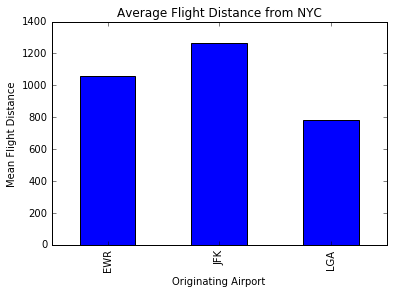

In [19]:
# Group flights_df and apply mean function
flight_dist = flights_df.groupby('origin').mean()

print flight_dist['distance']

# Plot a simple bar chart to see difference in average distance flown from each of the originating airports
flight_dist.distance.plot(kind = 'bar')
plt.xlabel('Originating Airport')
plt.ylabel('Mean Flight Distance')
plt.title(r'Average Flight Distance from NYC')


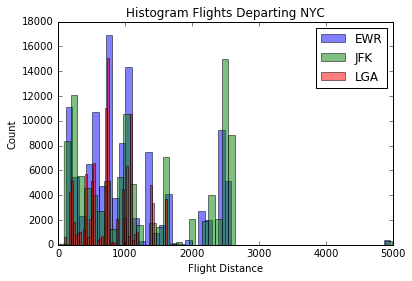

In [20]:
# Create a series containing distance for each of the origin airports by filtering on origin

flights_EWR = flights_df['distance'][flights_df['origin']== 'EWR']
flights_JFK = flights_df['distance'][flights_df['origin']== 'JFK']
flights_LGA = flights_df['distance'][flights_df['origin']== 'LGA']

# Plot a histogram for each of the above series, and overlay on same plot to see comparison
plt.hist(flights_EWR.values, 50, alpha=0.5, label='EWR')

plt.hist(flights_JFK.values, 50, alpha=0.5, label='JFK')

plt.hist(flights_LGA.values, 50, alpha=0.5, label='LGA')

# Add labels for clarity
plt.xlabel('Flight Distance')
plt.ylabel('Count')
plt.title(r'Histogram Flights Departing NYC')
plt.legend(loc='upper right')


It appears that each airport has a unique flight distance profile. Newark services a wide range of distances, from 100 to > 2500 miles. There is a bimodal distribution, with a cluster of flights around ~750 miles and ~2500 miles. JFK has a similar spread, but with significantly more flights clustered around ~2600 miles. LaGuardia appears to have a more even distribution around ~ 750 miles, with no clustering above 2000 miles. This suggests that JFK is used the most for long range flights. All 3 airports have significant traffic in the < 1000 mile range. LaGuardia has the lowest average flight distance.

## Question 6
What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

In [21]:
# Used weather dataset from R package "nycflights13". Assumes file "weather.csv" is in working dir.
# Reference: https://cran.r-project.org/web/packages/nycflights13/index.html

# Load weather data into df
weather_df = pd.read_csv('weather.csv')

# View dataset datatypes
print weather_df.dtypes

# Look for missing date records
print weather_df[np.isnan(weather_df['month'])]

# Remove missing date records so we can create datetime column 
for col in ['year', 'month', 'day']:
    weather_df = weather_df[weather_df[col].notnull()]

# Check to see if NaNs remain
print weather_df[np.isnan(weather_df['month'])]

# Create date column to join with flights_df date column

weather_df['date'] = pd.to_datetime(weather_df['year'] * 10000 + weather_df['month'].astype(int) * 100 + weather_df['day'].astype(int), format = '%Y%m%d')

# Merge flights_df and weather_df datasets for analysis. Use 'date' and 'hour' fields as keys
flight_weather = pd.merge(flights_df[flights_df['dep_delay'] > 0], weather_df, how='inner', on=['date', 'hour'])



Unnamed: 0      int64
origin         object
year            int64
month         float64
day           float64
hour          float64
temp          float64
dewp          float64
humid         float64
wind_dir      float64
wind_speed    float64
wind_gust     float64
precip        float64
pressure      float64
visib         float64
dtype: object
      Unnamed: 0 origin  year  month  day  hour   temp   dewp  humid  \
1630        1631    EWR  2013    NaN  NaN   NaN  44.96  17.96  33.55   

      wind_dir  wind_speed  wind_gust  precip  pressure  visib  
1630        20     3.45234   3.972884       0    1025.9     10  
Empty DataFrame
Columns: [Unnamed: 0, origin, year, month, day, hour, temp, dewp, humid, wind_dir, wind_speed, wind_gust, precip, pressure, visib]
Index: []


In [23]:
# Look at wind_speed variable
flight_weather.wind_speed.describe()

# Eliminate high outlier record
flight_weather = flight_weather[flight_weather.wind_speed != flight_weather.wind_speed.max()]

# Re-check wind_speed variable 
flight_weather.wind_speed.describe()

count    128017.000000
mean          9.920069
std           5.492763
min           0.000000
25%           5.753900
50%           9.206240
75%          12.658580
max          39.126520
Name: wind_speed, dtype: float64

                            OLS Regression Results                            
Dep. Variable:              dep_delay   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     752.2
Date:                Tue, 12 Jan 2016   Prob (F-statistic):           3.47e-45
Time:                        23:17:08   Log-Likelihood:                -359.49
No. Observations:                  90   AIC:                             721.0
Df Residuals:                      89   BIC:                             723.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.6232      0.023     27.426      0.0

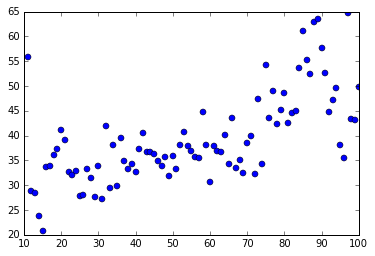

                            OLS Regression Results                            
Dep. Variable:              dep_delay   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     134.9
Date:                Tue, 12 Jan 2016   Prob (F-statistic):           2.00e-12
Time:                        23:17:08   Log-Likelihood:                -130.40
No. Observations:                  30   AIC:                             262.8
Df Residuals:                      29   BIC:                             264.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.8624      0.160     11.614      0.0

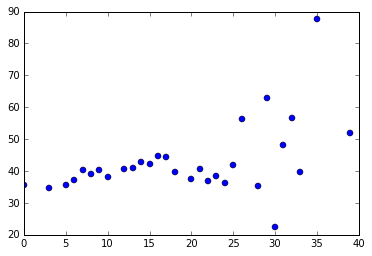

                            OLS Regression Results                            
Dep. Variable:              dep_delay   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     17.34
Date:                Tue, 12 Jan 2016   Prob (F-statistic):           0.000231
Time:                        23:17:08   Log-Likelihood:                -178.35
No. Observations:                  32   AIC:                             358.7
Df Residuals:                      31   BIC:                             360.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1           168.2201     40.392      4.165      0.0

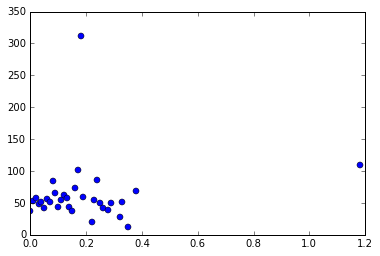

                            OLS Regression Results                            
Dep. Variable:              dep_delay   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     11.22
Date:                Tue, 12 Jan 2016   Prob (F-statistic):            0.00380
Time:                        23:17:08   Log-Likelihood:                -94.160
No. Observations:                  18   AIC:                             190.3
Df Residuals:                      17   BIC:                             191.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             7.8086      2.331      3.350      0.0

/Users/Brett/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1277: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


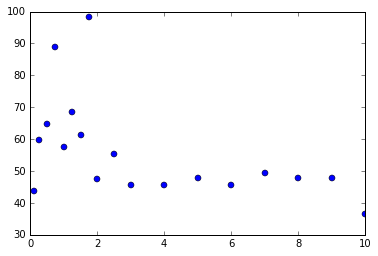

In [27]:
# Round temp and wind_speed values so we can group on them
flight_weather.temp = np.round(flight_weather.temp, 0)
flight_weather.wind_speed = np.round(flight_weather.wind_speed, 0)

# For each of 4 variables of interest (temp, wind speed, precip, visib):
# group by the variable, average the dep_delay, run a OLS regression, scatterplot the results

for i in ['temp', 'wind_speed', 'precip', 'visib']:
    y = flight_weather.groupby(i)['dep_delay'].mean()
    x = y.index
    results = sm.OLS(y, x).fit()
    print results.summary()
    plt.figure()
    plt.plot(x,y,'bo')
    plt.show()

Weather appears to have an effect on the average length of flight delays. Looking at each of Temperature, Wind Speed, Precipitation, and Visibility (the four weather measurements I selected as most interesting to analyze), we see some  relationships. Temperature has a strong relationship with departure delay length, evidenced by a visible linear pattern and a high R-squared value. In this simple linear model, temp explains 89% of the variation in dep_delay. Interestingly, the relationship is positive - higher temperature correlates with higher average delays. This is somewhat surprising, as this analyst would have expected cold temperatures to produce long delays. Wind_speed also appears to have an effect on delay length, though the pattern is not as strong. The R-squared is .79. Precipitation does not appear to be strongly related to departure delay. Visibility shows a relationship with departure delay. As expected, very low visibilities are associated with higher departure delays. For visibility >= 3 miles, there does not appear to be a significant effect on departure delay, as the line is relatively flat.